In [1]:
import importlib
import agents
importlib.reload(agents)

from agents import Model, replayBuffer, Agent
from env import CitizenBankEnv
from torch_geometric.utils import to_networkx, from_networkx

/opt/miniconda3/envs/mj/lib/python3.12/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: dlopen(/opt/miniconda3/envs/mj/lib/python3.12/site-packages/torch_cluster/_fps_cpu.so, 0x0006): symbol not found in flat namespace '__ZN3c1013ParallelGuardC1Eb'
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/opt/miniconda3/envs/mj/lib/python3.12/site-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: dlopen(/opt/miniconda3/envs/mj/lib/python3.12/site-packages/torch_sparse/_version_cpu.so, 0x0006): tried: '/opt/miniconda3/envs/mj/lib/python3.12/site-packages/torch_sparse/_version_cpu.so' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64h' or 'x86_64')), '/System/Volumes/Preboot/Cryptexes/OS/opt/miniconda3/envs/mj/lib/python3.12/site-packages/torch_sparse/_version_cpu.so' (no

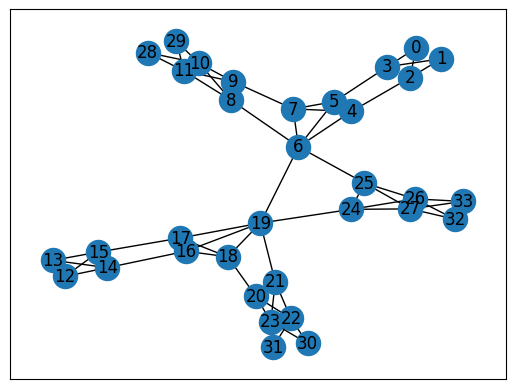

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('links.csv')[['DeviceA_Code','DeviceB_Code']]
points_list = [(i,j) for i,j in df.values]

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G, seed=0)

seperate = True
if seperate:
    nx.draw_networkx_nodes(G,pos)
    nx.draw_networkx_edges(G,pos)
    nx.draw_networkx_labels(G,pos)
    plt.show()
else:
    #nx.draw_networkx(G, pos=nx.spring_layout(G, seed=0), with_labels=True, node_color=data.y, cmap="Set2")
    nx.draw_networks(G)
    plt.show()


## Q learning One Hot

### Only dest

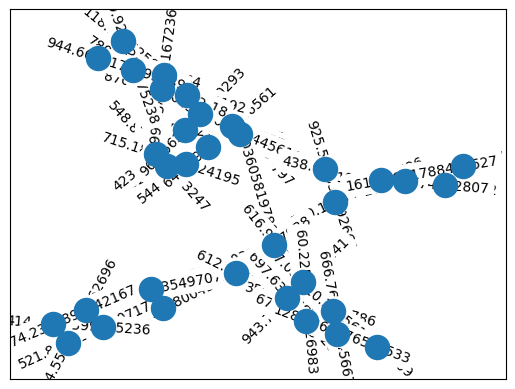

100%|██████████| 300/300 [01:04<00:00,  4.66it/s]

cost:         2925.807140997168
DQ learning path:  [0, 2, 4, 6, 19, 18, 20]
dijkstra path:     [0, 2, 4, 6, 19, 18, 20]
cost:         3092.183003442263
DQ learning path:  [1, 2, 4, 6, 19, 18, 20]
dijkstra path:     [1, 2, 4, 6, 19, 18, 20]
cost:         2376.9936370698433
DQ learning path:  [2, 4, 6, 19, 18, 20]
dijkstra path:     [2, 4, 6, 19, 18, 20]
cost:         3053.4187403169826
DQ learning path:  [3, 5, 6, 19, 18, 20]
dijkstra path:     [3, 5, 6, 19, 18, 20]
cost:         1953.3388377309388
DQ learning path:  [4, 6, 19, 18, 20]
dijkstra path:     [4, 6, 19, 18, 20]
cost:         2407.5246272503264
DQ learning path:  [5, 6, 19, 18, 20]
dijkstra path:     [5, 6, 19, 18, 20]
cost:         1515.7516264682463
DQ learning path:  [6, 19, 18, 20]
dijkstra path:     [6, 19, 18, 20]
cost:         2307.4766645509108
DQ learning path:  [7, 6, 19, 18, 20]
dijkstra path:     [7, 6, 19, 18, 20]
cost:         2044.6465462211509
DQ learning path:  [8, 6, 19, 18, 20]
dijkstra path:     [8, 6, 19,

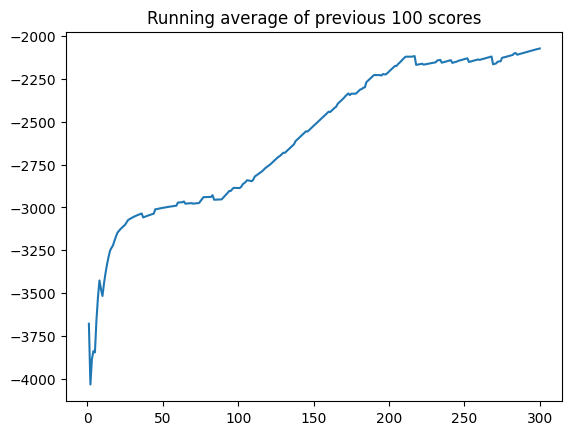

In [18]:
import importlib
import only_dest.agent_one_hot_d
importlib.reload(only_dest.agent_one_hot_d)
from only_dest.agent_one_hot_d import *
import only_dest.env_one_hot_d
importlib.reload(only_dest.env_one_hot_d)
from only_dest.env_one_hot_d import *

import time 
start_time = time.time()


# max_iters should be large enough to be able find the optimal solution
for dest in [20]:
    env = CitizenBankEnv(dest)
    trainer = Agent(env, env.num_devices, 50, 50, 10000, alpha=2.5e-4, batch_size=126,  max_iters =300 , epsilon=1, min_epsilon=0.03, steps_target=1000, gamma=0.95)
    trainer.train()
    
    for src in range(trainer.env.num_devices):
        if src != dest:
            path, cost = trainer.find_path(src)

            print('cost:        ', cost)
            print('DQ learning path: ', path)
            print('dijkstra path:    ', nx.shortest_path(G, src, dest, weight='Bandwidth (Mbps)'))
    
print('---- {} seconds'.format(time.time() - start_time))

### All src/dest combinations
This did not work, no model can handle all the src and dest combinations

In [4]:
import importlib
import all_combinations.agent_one_hot
importlib.reload(all_combinations.agent_one_hot)
from all_combinations.agent_one_hot import *
import all_combinations.env_one_hot
importlib.reload(all_combinations.env_one_hot)
from all_combinations.env_one_hot import *

import time 

start_time = time.time()

env = CitizenBankEnv()
trainer = Agent(env, env.num_devices, 50, 50,   1000,        alpha=2.5e-5, batch_size=126,  max_iters =20, epsilon=1, \
                min_epsilon=0.03, steps_target=100, gamma=0.95)
trainer.train_combinations()
"""
if reward_list:
    x = [i+1 for i in range(iters)]
    trainer.plot_learning_curve(x, reward_list)
    path, cost = trainer.find_path(src, dest)
    print('qlearning path: ', path, 'cost: ', cost)
print('dijkstra path:  ', nx.shortest_path(G, src, dest, weight='Bandwidth (Mbps)'))
"""

path, cost = trainer.find_path(12, 1)
print(path)
print('cost: ', cost)

ModuleNotFoundError: No module named 'gym'

### Only one src and dest

Each src and dest will have a network model

Initial state:  30
Destination:  13
[-27000.0, -5000.0, -5000.0, -5000.0, -5000.0, -340000.0, -340000.0, -295000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -7000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -7000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5000.0, -5

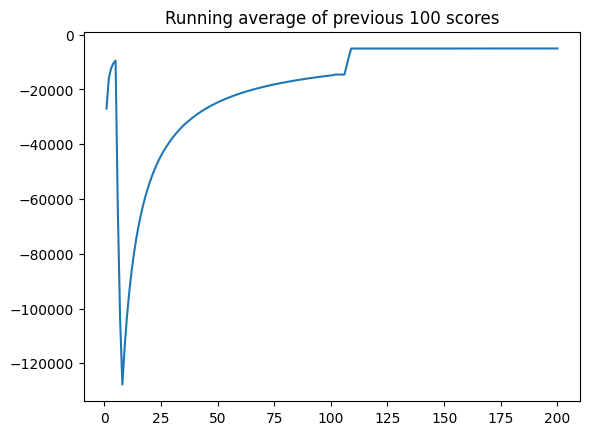

In [7]:
import importlib
import src_dest.agent_one_hot_sd
importlib.reload(src_dest.agent_one_hot_sd)
from src_dest.agent_one_hot_sd import *
import src_dest.env_one_hot_sd
importlib.reload(src_dest.env_one_hot_sd)
from src_dest.env_one_hot_sd import *

env = CitizenBankEnv()
trainer = Agent(env, env.num_devices, 50, 50,10000,alpha=2.5e-3, batch_size=126, max_iters =200, epsilon=1, min_epsilon=0.03, steps_target=100, gamma=0.95)
state = [30,13]

trainer.train(state[0],state[1])
path, cost = trainer.find_path(state[0],state[1])
print('DeepQ path:     ', path, 'cost: ', cost)
print('dijkstra path:  ', nx.shortest_path(G, state[0], state[1], weight='Bandwidth (Mbps)'))

## Q Learning GNN

In [2]:
import importlib
import agent_gnn
importlib.reload(agent_gnn)
from agent_gnn import *

import env
importlib.reload(env)
from env import *

env = CitizenBankEnv()
print(env.num_devices)

trainer = Agent(env, env.num_devices, 20,       20,        30, 20, 10000,       alpha=2.5e-5, batch_size=236,  max_iters =200, epsilon=0.05, steps_target=500, gamma=0.95)
trainer.train()
"""
if reward_list:
    x = [i+1 for i in range(iters)]
    trainer.plot_learning_curve(x, reward_list)
    path, cost = trainer.find_path(src, dest)
    print('qlearning path: ', path, 'cost: ', cost)
print('dijkstra path:  ', nx.shortest_path(G, src, dest, weight='Bandwidth (Mbps)'))
"""

path, cost = trainer.find_path(0, 4)

print(path)
print('cost: ', cost)


34


RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [1, 1, 20]] is at version 1; expected version 0 instead. Hint: the backtrace further above shows the operation that failed to compute its gradient. The variable in question was changed in there or anywhere later. Good luck!

In [1]:
from torch_geometric.utils import to_networkx, from_networkx

src = 20
dest= 23
path, cost = trainer.find_path(src, dest)
G = to_networkx(env.graph)
print('DeepQ    path:  ', path)
print('cost: ', cost)

print('dijkstra path:  ', nx.shortest_path(G, src, dest))

NameError: name 'trainer' is not defined

In [99]:
env.graph

Data(edge_index=[2, 112], num_nodes=34, x=[34, 34])

In [3]:
import torch
import torch.nn as nn

# Assume action_logits is a tensor of action logits (unnormalized probabilities)
action_logits = torch.tensor([1.2, 0.8, 0.5, -0.3])  # Example logits
action_mask = torch.tensor([1, 0, 1, 0], dtype=torch.bool)  # 1 for valid, 0 for invalid

# Set logits of invalid actions to a very large negative value (e.g., -inf) to mask them
masked_logits = action_logits.masked_fill(~action_mask, -float('inf'))
print(masked_logits)

# Convert logits to probabilities
action_probs = nn.functional.softmax(masked_logits, dim=-1)
print(action_probs)

tensor([1.2000,   -inf, 0.5000,   -inf])
tensor([0.6682, 0.0000, 0.3318, 0.0000])
